In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Leads.csv')

In [3]:
len(df)

9240

## Initial data preparation

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
categorical = [
            'lead_origin','lead_source','do_not_email','do_not_call',
            'last_activity','country','specialization', 'how_did_you_hear_about_x_education',
            'what_is_your_current_occupation','what_matters_most_to_you_in_choosing_a_course','search',
            'magazine','newspaper_article','digital_advertisement', 'through_recommendations',
            'receive_more_updates_about_our_courses', 'tags', 'lead_quality','update_me_on_supply_chain_content',
            'lead_profile','city', 'asymmetrique_activity_index','asymmetrique_profile_index',
            'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview',
            'last_notable_activity', 'newspaper','x_education_forums','get_updates_on_dm_content'
                ]


numerical = [
    'lead_number', 'totalvisits','total_time_spent_on_website',
    'page_views_per_visit','asymmetrique_activity_score','asymmetrique_profile_score'
            ]

In [9]:
for cat in categorical:
    df[cat]= df[cat].fillna(df[cat].mode()[0])
for num in numerical :
    df[num]= df[num].fillna(df[num].mean())

In [10]:
df.isna().sum()

prospect_id                                      0
lead_number                                      0
lead_origin                                      0
lead_source                                      0
do_not_email                                     0
do_not_call                                      0
converted                                        0
totalvisits                                      0
total_time_spent_on_website                      0
page_views_per_visit                             0
last_activity                                    0
country                                          0
specialization                                   0
how_did_you_hear_about_x_education               0
what_is_your_current_occupation                  0
what_matters_most_to_you_in_choosing_a_course    0
search                                           0
magazine                                         0
newspaper_article                                0
x_education_forums             

In [11]:
df.head().T

,0,1,2,3,4
prospect_id,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
lead_number,660737,660728,660727,660719,660681
lead_origin,api,api,landing_page_submission,landing_page_submission,landing_page_submission
lead_source,olark_chat,organic_search,direct_traffic,direct_traffic,google
do_not_email,no,no,no,no,no
do_not_call,no,no,no,no,no
converted,0,0,1,0,1
totalvisits,0.0,5.0,2.0,1.0,2.0
total_time_spent_on_website,0,674,1532,305,1428
page_views_per_visit,0.0,2.5,2.0,1.0,1.0


In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df.head().T

,0,1,2,3,4
prospect_id,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
lead_number,660737,660728,660727,660719,660681
lead_origin,api,api,landing_page_submission,landing_page_submission,landing_page_submission
lead_source,olark_chat,organic_search,direct_traffic,direct_traffic,google
do_not_email,no,no,no,no,no
do_not_call,no,no,no,no,no
converted,0,0,1,0,1
totalvisits,0.0,5.0,2.0,1.0,2.0
total_time_spent_on_website,0,674,1532,305,1428
page_views_per_visit,0.0,2.5,2.0,1.0,1.0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [17]:
len(df_train), len(df_val), len(df_test)

(5544, 1848, 1848)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [20]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Exploratory data analysis

In [21]:
df_full_train = df_train_full.reset_index(drop=True)

In [22]:
df_full_train.converted.value_counts()

0    4560
1    2832
Name: converted, dtype: int64

In [23]:
df_full_train.converted.value_counts(normalize=True)

0    0.616883
1    0.383117
Name: converted, dtype: float64

In [24]:
df.isna().sum()

prospect_id                                      0
lead_number                                      0
lead_origin                                      0
lead_source                                      0
do_not_email                                     0
do_not_call                                      0
converted                                        0
totalvisits                                      0
total_time_spent_on_website                      0
page_views_per_visit                             0
last_activity                                    0
country                                          0
specialization                                   0
how_did_you_hear_about_x_education               0
what_is_your_current_occupation                  0
what_matters_most_to_you_in_choosing_a_course    0
search                                           0
magazine                                         0
newspaper_article                                0
x_education_forums             

In [25]:
df_train_full.converted.value_counts(normalize=True)

0    0.616883
1    0.383117
Name: converted, dtype: float64

In [26]:
global_mean = df_train_full.converted.mean()
round(global_mean, 3)

0.383

In [27]:
categorical = [
            'lead_origin','lead_source','do_not_email','do_not_call',
            'last_activity','country','specialization', 'how_did_you_hear_about_x_education',
            'what_is_your_current_occupation','what_matters_most_to_you_in_choosing_a_course','search',
            'magazine','newspaper_article','digital_advertisement', 'through_recommendations',
            'receive_more_updates_about_our_courses', 'tags', 'lead_quality','update_me_on_supply_chain_content',
            'lead_profile','city', 'asymmetrique_activity_index','asymmetrique_profile_index',
            'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview',
            'last_notable_activity', 'newspaper','x_education_forums','get_updates_on_dm_content'
                ]


numerical = [
    'lead_number', 'totalvisits','total_time_spent_on_website',
    'page_views_per_visit','asymmetrique_activity_score','asymmetrique_profile_score'
            ]

In [28]:
categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'last_activity',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'tags',
 'lead_quality',
 'update_me_on_supply_chain_content',
 'lead_profile',
 'city',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity',
 'newspaper',
 'x_education_forums',
 'get_updates_on_dm_content']

In [29]:
df_train_full[categorical].nunique()

lead_origin                                       5
lead_source                                      19
do_not_email                                      2
do_not_call                                       2
last_activity                                    16
country                                          36
specialization                                   19
how_did_you_hear_about_x_education               10
what_is_your_current_occupation                   6
what_matters_most_to_you_in_choosing_a_course     2
search                                            2
magazine                                          1
newspaper_article                                 2
digital_advertisement                             2
through_recommendations                           2
receive_more_updates_about_our_courses            1
tags                                             26
lead_quality                                      5
update_me_on_supply_chain_content                 1
lead_profile

## Feature importance

In [30]:
from IPython.display import display

In [31]:
global_mean = df_train_full.converted.mean()
global_mean

0.38311688311688313

In [32]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).converted.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
lead_origin,,,
api,0.308414,-0.074702,0.805014
landing_page_submission,0.360677,-0.022440,0.941427
lead_add_form,0.919861,0.536744,2.400992
lead_import,0.225000,-0.158117,0.587288
quick_add_form,1.000000,0.616883,2.610169


,mean,diff,risk
lead_source,,,
bing,0.166667,-0.216450,0.435028
blog,0.000000,-0.383117,0.000000
click2call,0.750000,0.366883,1.957627
direct_traffic,0.317624,-0.065493,0.829052
facebook,0.225000,-0.158117,0.587288
google,0.404567,0.021450,1.055988
live_chat,1.000000,0.616883,2.610169
nc_edm,1.000000,0.616883,2.610169
olark_chat,0.251768,-0.131349,0.657157


,mean,diff,risk
do_not_email,,,
no,0.401265,0.018148,1.047368
yes,0.174281,-0.208836,0.454903


,mean,diff,risk
do_not_call,,,
no,0.383033,-0.000083,0.999782
yes,1.000000,0.616883,2.610169


,mean,diff,risk
last_activity,,,
approached_upfront,1.000000,0.616883,2.610169
converted_to_lead,0.126437,-0.256680,0.330021
email_bounced,0.092308,-0.290809,0.240939
email_link_clicked,0.239437,-0.143680,0.624970
email_marked_spam,1.000000,0.616883,2.610169
email_opened,0.375311,-0.007806,0.979626
email_received,1.000000,0.616883,2.610169
form_submitted_on_website,0.255102,-0.128015,0.665860
had_a_phone_conversation,0.727273,0.344156,1.898305


,mean,diff,risk
country,,,
asia/pacific_region,0.500000,0.116883,1.305085
australia,0.222222,-0.160895,0.580038
bahrain,0.666667,0.283550,1.740113
bangladesh,0.500000,0.116883,1.305085
belgium,0.000000,-0.383117,0.000000
canada,0.000000,-0.383117,0.000000
china,0.000000,-0.383117,0.000000
denmark,1.000000,0.616883,2.610169
france,0.600000,0.216883,1.566102


,mean,diff,risk
specialization,,,
"banking,_investment_and_insurance",0.458333,0.075216,1.196328
business_administration,0.457478,0.074361,1.194095
e-business,0.408163,0.025046,1.065375
e-commerce,0.356322,-0.026795,0.930060
finance_management,0.453865,0.070748,1.184665
healthcare_management,0.504065,0.120948,1.315695
hospitality_management,0.363636,-0.019481,0.949153
human_resource_management,0.455474,0.072358,1.188866
international_business,0.361702,-0.021415,0.944104


,mean,diff,risk
how_did_you_hear_about_x_education,,,
advertisements,0.450980,0.067864,1.177135
email,0.421053,0.037936,1.099019
multiple_sources,0.349593,-0.033523,0.912498
online_search,0.425868,0.042751,1.111586
other,0.412903,0.029786,1.077747
select,0.371148,-0.011969,0.968760
sms,0.200000,-0.183117,0.522034
social_media,0.428571,0.045455,1.118644
student_of_someschool,0.475410,0.092293,1.240900


,mean,diff,risk
what_is_your_current_occupation,,,
businessman,0.500000,0.116883,1.305085
housewife,1.000000,0.616883,2.610169
other,0.615385,0.232268,1.606258
student,0.359281,-0.023835,0.937785
unemployed,0.337451,-0.045666,0.880804
working_professional,0.916071,0.532955,2.391102


,mean,diff,risk
what_matters_most_to_you_in_choosing_a_course,,,
better_career_prospects,0.383085,-0.000032,0.999917
flexibility_&_convenience,0.500000,0.116883,1.305085


,mean,diff,risk
search,,,
no,0.383146,0.000029,1.000076
yes,0.363636,-0.019481,0.949153


,mean,diff,risk
magazine,,,
no,0.383117,0.0,1.0


,mean,diff,risk
newspaper_article,,,
no,0.383033,-0.000083,0.999782
yes,1.000000,0.616883,2.610169


,mean,diff,risk
digital_advertisement,,,
no,0.383221,0.000104,1.000271
yes,0.000000,-0.383117,0.000000


,mean,diff,risk
through_recommendations,,,
no,0.382918,-0.000199,0.999482
yes,0.750000,0.366883,1.957627


,mean,diff,risk
receive_more_updates_about_our_courses,,,
no,0.383117,0.0,1.0


,mean,diff,risk
tags,,,
already_a_student,0.007752,-0.375365,0.020234
busy,0.567742,0.184625,1.481903
closed_by_horizzon,0.996454,0.613337,2.600914
diploma_holder_(not_eligible),0.020833,-0.362284,0.054379
graduation_in_progress,0.063830,-0.319287,0.166607
in_confusion_whether_part_time_or_dlp,0.250000,-0.133117,0.652542
in_touch_with_eins,0.272727,-0.110390,0.711864
interested__in_full_time_mba,0.010989,-0.372128,0.028683
interested_in_next_batch,1.000000,0.616883,2.610169


,mean,diff,risk
lead_quality,,,
high_in_relevance,0.948718,0.565601,2.476315
low_in_relevance,0.803063,0.419947,2.096132
might_be,0.348024,-0.035093,0.908401
not_sure,0.242597,-0.140520,0.633219
worst,0.020408,-0.362709,0.053269


,mean,diff,risk
update_me_on_supply_chain_content,,,
no,0.383117,0.0,1.0


,mean,diff,risk
lead_profile,,,
dual_specialization_student,1.000000,0.616883,2.610169
lateral_student,0.952381,0.569264,2.485876
other_leads,0.351621,-0.031496,0.917790
potential_lead,0.781591,0.398474,2.040086
select,0.301152,-0.081965,0.786058
student_of_someschool,0.024752,-0.358364,0.064608


,mean,diff,risk
city,,,
mumbai,0.312331,-0.070786,0.815237
other_cities,0.408015,0.024898,1.064987
other_cities_of_maharashtra,0.437326,0.054209,1.141495
other_metro_cities,0.401961,0.018844,1.049186
select,0.485479,0.102363,1.267184
thane_&_outskirts,0.447412,0.064295,1.167822
tier_ii_cities,0.339286,-0.043831,0.885593


,mean,diff,risk
asymmetrique_activity_index,,,
01.high,0.313522,-0.069595,0.818344
02.medium,0.404083,0.020966,1.054725
03.low,0.092715,-0.290402,0.242002


,mean,diff,risk
asymmetrique_profile_index,,,
01.high,0.482525,0.099408,1.259473
02.medium,0.351448,-0.031669,0.917339
03.low,0.416667,0.033550,1.087571


,mean,diff,risk
i_agree_to_pay_the_amount_through_cheque,,,
no,0.383117,0.0,1.0


,mean,diff,risk
a_free_copy_of_mastering_the_interview,,,
no,0.39578,0.012663,1.033053
yes,0.35545,-0.027667,0.927785


,mean,diff,risk
last_notable_activity,,,
approached_upfront,1.000000,0.616883,2.610169
email_bounced,0.160000,-0.223117,0.417627
email_link_clicked,0.222222,-0.160895,0.580038
email_marked_spam,1.000000,0.616883,2.610169
email_opened,0.364362,-0.018755,0.951046
email_received,1.000000,0.616883,2.610169
form_submitted_on_website,0.000000,-0.383117,0.000000
had_a_phone_conversation,0.900000,0.516883,2.349153
modified,0.230430,-0.152687,0.601461


,mean,diff,risk
newspaper,,,
no,0.383169,0.000052,1.000135
yes,0.000000,-0.383117,0.000000


,mean,diff,risk
x_education_forums,,,
no,0.383117,0.0,1.0


,mean,diff,risk
get_updates_on_dm_content,,,
no,0.383117,0.0,1.0


In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.converted)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
tags,0.209400
lead_quality,0.106262
last_activity,0.084629
lead_profile,0.082977
last_notable_activity,0.072517


,MI
update_me_on_supply_chain_content,0.0
magazine,0.0
i_agree_to_pay_the_amount_through_cheque,0.0
x_education_forums,0.0
get_updates_on_dm_content,0.0


### Feature Importance: Correlation Coefficient

In [35]:
df_train_full[numerical].corrwith(df_train_full.converted).to_frame('correlation')

,correlation
lead_number,0.021904
totalvisits,0.033282
total_time_spent_on_website,0.363470
page_views_per_visit,0.001532
asymmetrique_activity_score,0.122210
asymmetrique_profile_score,0.165779


In [36]:
df_train_full.groupby(by='converted')[numerical].mean()

,lead_number,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_score,asymmetrique_profile_score
converted,,,,,,
0,616790.432018,3.328928,331.447149,2.369454,14.207726,16.181521
1,617845.297316,3.676262,740.735876,2.376293,14.467645,16.633914


## One-hot encoding

In [37]:
from sklearn.feature_extraction import DictVectorizer

In [38]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [39]:
df_train[['lead_origin','lead_source']].iloc[:10]

,lead_origin,lead_source
0,landing_page_submission,organic_search
1,landing_page_submission,direct_traffic
2,landing_page_submission,direct_traffic
3,api,olark_chat
4,landing_page_submission,direct_traffic
5,landing_page_submission,direct_traffic
6,api,google
7,landing_page_submission,direct_traffic
8,api,olark_chat
9,landing_page_submission,google


In [40]:
train_dict[0]

{'lead_origin': 'landing_page_submission',
 'lead_source': 'organic_search',
 'do_not_email': 'no',
 'do_not_call': 'no',
 'last_activity': 'sms_sent',
 'country': 'netherlands',
 'specialization': 'human_resource_management',
 'how_did_you_hear_about_x_education': 'select',
 'what_is_your_current_occupation': 'unemployed',
 'what_matters_most_to_you_in_choosing_a_course': 'better_career_prospects',
 'search': 'no',
 'magazine': 'no',
 'newspaper_article': 'no',
 'digital_advertisement': 'no',
 'through_recommendations': 'no',
 'receive_more_updates_about_our_courses': 'no',
 'tags': 'ringing',
 'lead_quality': 'not_sure',
 'update_me_on_supply_chain_content': 'no',
 'lead_profile': 'select',
 'city': 'mumbai',
 'asymmetrique_activity_index': '02.medium',
 'asymmetrique_profile_index': '02.medium',
 'i_agree_to_pay_the_amount_through_cheque': 'no',
 'a_free_copy_of_mastering_the_interview': 'yes',
 'last_notable_activity': 'sms_sent',
 'newspaper': 'no',
 'x_education_forums': 'no',
 '

In [41]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [42]:
X_train = dv.transform(train_dict)

In [43]:
X_train.shape

(5544, 202)

In [44]:
y_test.shape

(1848,)

In [45]:
dv.get_feature_names()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['a_free_copy_of_mastering_the_interview=no',
 'a_free_copy_of_mastering_the_interview=yes',
 'asymmetrique_activity_index=01.high',
 'asymmetrique_activity_index=02.medium',
 'asymmetrique_activity_index=03.low',
 'asymmetrique_activity_score',
 'asymmetrique_profile_index=01.high',
 'asymmetrique_profile_index=02.medium',
 'asymmetrique_profile_index=03.low',
 'asymmetrique_profile_score',
 'city=mumbai',
 'city=other_cities',
 'city=other_cities_of_maharashtra',
 'city=other_metro_cities',
 'city=select',
 'city=thane_&_outskirts',
 'city=tier_ii_cities',
 'country=asia/pacific_region',
 'country=australia',
 'country=bahrain',
 'country=bangladesh',
 'country=belgium',
 'country=canada',
 'country=china',
 'country=denmark',
 'country=france',
 'country=germany',
 'country=ghana',
 'country=hong_kong',
 'country=india',
 'country=italy',
 'country=kenya',
 'country=kuwait',
 'country=liberia',
 'country=netherlands',
 'country=nigeria',
 'country=oman',
 'country=philippines',
 'co

### Logistic Regression

In [46]:
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

In [47]:
# z = np.linspace(-7, 7, 51)

In [48]:
# sigmoid(z)

In [49]:
# plt.plot(z, sigmoid(z))

In [50]:
# def linear_regression(xi):
#     result = w0
    
#     for j in range(len(w)):
#         result = result + xi[j] * w[j]
        
#     return result

In [51]:
# def logistic_regression(xi):
#     result = w0
    
#     for j in range(len(w)):
#         score = score + xi[j] * w[j]
        
    
#     result = sigmoid(score)    
#     return result

## Training logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [54]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [55]:
model.predict_proba(X_val)

array([[0.74944579, 0.25055421],
       [0.30230949, 0.69769051],
       [0.5210388 , 0.4789612 ],
       ...,
       [0.6362481 , 0.3637519 ],
       [0.7608449 , 0.2391551 ],
       [0.31100129, 0.68899871]])

In [56]:
y_pred = model.predict_proba(X_val)[:, 1]

In [57]:
y_pred

array([0.25055421, 0.69769051, 0.4789612 , ..., 0.3637519 , 0.2391551 ,
       0.68899871])

In [58]:
converted = y_pred > 0.5

In [59]:
(y_val == converted).mean()

0.7267316017316018

## Model interpretation

In [60]:
model.intercept_[0]

-1.475379844166226e-08

In [61]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'a_free_copy_of_mastering_the_interview=no': 0.0,
 'a_free_copy_of_mastering_the_interview=yes': -0.0,
 'asymmetrique_activity_index=01.high': -0.0,
 'asymmetrique_activity_index=02.medium': 0.0,
 'asymmetrique_activity_index=03.low': -0.0,
 'asymmetrique_activity_score': 0.0,
 'asymmetrique_profile_index=01.high': 0.0,
 'asymmetrique_profile_index=02.medium': -0.0,
 'asymmetrique_profile_index=03.low': 0.0,
 'asymmetrique_profile_score': 0.0,
 'city=mumbai': -0.0,
 'city=other_cities': 0.0,
 'city=other_cities_of_maharashtra': 0.0,
 'city=other_metro_cities': 0.0,
 'city=select': 0.0,
 'city=thane_&_outskirts': 0.0,
 'city=tier_ii_cities': -0.0,
 'country=asia/pacific_region': 0.0,
 'country=australia': -0.0,
 'country=bahrain': 0.0,
 'country=bangladesh': 0.0,
 'country=belgium': -0.0,
 'country=canada': -0.0,
 'country=china': -0.0,
 'country=denmark': 0.0,
 'country=france': -0.0,
 'country=germany': -0.0,
 'country=ghana': -0.0,
 'country=hong_kong': 0.0,
 'country=india': 0.0,
 

In [62]:
subset = ['tags', 'lead_number', 'totalvisits']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names()

['lead_number',
 'tags=already_a_student',
 'tags=busy',
 'tags=closed_by_horizzon',
 'tags=diploma_holder_(not_eligible)',
 'tags=graduation_in_progress',
 'tags=in_confusion_whether_part_time_or_dlp',
 'tags=in_touch_with_eins',
 'tags=interested__in_full_time_mba',
 'tags=interested_in_next_batch',
 'tags=interested_in_other_courses',
 'tags=invalid_number',
 'tags=lost_to_eins',
 'tags=lost_to_others',
 'tags=not_doing_further_education',
 'tags=number_not_provided',
 'tags=opp_hangup',
 'tags=ringing',
 'tags=shall_take_in_the_next_coming_month',
 'tags=still_thinking',
 'tags=switched_off',
 'tags=university_not_recognized',
 'tags=want_to_take_admission_but_has_financial_problems',
 'tags=will_revert_after_reading_the_email',
 'tags=wrong_number_given',
 'totalvisits']

In [63]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [64]:
model_small.intercept_[0]

-1.2483009809963478e-12

In [65]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'lead_number': -0.0,
 'tags=already_a_student': -0.0,
 'tags=busy': 0.0,
 'tags=closed_by_horizzon': 0.0,
 'tags=diploma_holder_(not_eligible)': -0.0,
 'tags=graduation_in_progress': -0.0,
 'tags=in_confusion_whether_part_time_or_dlp': -0.0,
 'tags=in_touch_with_eins': -0.0,
 'tags=interested__in_full_time_mba': -0.0,
 'tags=interested_in_next_batch': 0.0,
 'tags=interested_in_other_courses': -0.0,
 'tags=invalid_number': -0.0,
 'tags=lost_to_eins': 0.0,
 'tags=lost_to_others': -0.0,
 'tags=not_doing_further_education': -0.0,
 'tags=number_not_provided': -0.0,
 'tags=opp_hangup': -0.0,
 'tags=ringing': -0.0,
 'tags=shall_take_in_the_next_coming_month': -0.0,
 'tags=still_thinking': -0.0,
 'tags=switched_off': -0.0,
 'tags=university_not_recognized': -0.0,
 'tags=want_to_take_admission_but_has_financial_problems': -0.0,
 'tags=will_revert_after_reading_the_email': 0.0,
 'tags=wrong_number_given': -0.0,
 'totalvisits': -0.0}

In [66]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [67]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [68]:
y_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Using the model

In [69]:
prospect = {
'prospect_id': '2f302f24-3151-4763-afdc-a80d9750b3d8',
 'lead_origin': 'lead_add_form',
 'lead_source': 'reference',
 'do_not_email': 'no',
 'do_not_call': 'no',
 'last_activity': 'sms_sent',
 'country': 'india',
 'specialization': 'select',
 'how_did_you_hear_about_x_education': 'select',
 'what_is_your_current_occupation': 'unemployed',
 'what_matters_most_to_you_in_choosing_a_course': 'better_career_prospects',
 'search': 'no',
 'magazine': 'no',
 'newspaper_article': 'no',
 'digital_advertisement': 'no',
 'through_recommendations': 'no',
 'receive_more_updates_about_our_courses': 'no',
 'tags': 'will_revert_after_reading_the_email',
 'lead_quality': 'might_be',
 'update_me_on_supply_chain_content': 'no',
 'lead_profile': 'select',
 'city': 'select',
 'asymmetrique_activity_index': '02.medium',
 'asymmetrique_profile_index': '02.medium',
 'i_agree_to_pay_the_amount_through_cheque': 'no',
 'a_free_copy_of_mastering_the_interview': 'no',
 'last_notable_activity': 'sms_sent',
 'newspaper': 'no',
 'x_education_forums': 'no',
 'get_updates_on_dm_content': 'no',
 'lead_number': 627173,
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0,
 'asymmetrique_activity_score': 14.306252489048187,
 'asymmetrique_profile_score': 16.344882516925527
}

In [70]:
X_test = dv.transform([prospect])
model.predict_proba(X_test)[0, 1]

0.22892012087019842

In [71]:
print(list(X_test[0]))

[1.0, 0.0, 0.0, 1.0, 0.0, 14.306252489048187, 0.0, 1.0, 0.0, 16.344882516925527, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 627173.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,

In [72]:
prospect = {
    'prospect_id': '2f302f24-3151-4763-afdc-a80d9750b3d8',
 'lead_origin': 'lead_add_form',
 'lead_source': 'reference',
 'do_not_email': 'no',
 'do_not_call': 'no',
 'last_activity': 'sms_sent',
 'country': 'india',
 'specialization': 'select',
 'how_did_you_hear_about_x_education': 'select',
 'what_is_your_current_occupation': 'unemployed',
 'what_matters_most_to_you_in_choosing_a_course': 'better_career_prospects',
 'search': 'no',
 'magazine': 'no',
 'newspaper_article': 'no',
 'digital_advertisement': 'no',
 'through_recommendations': 'no',
 'receive_more_updates_about_our_courses': 'no',
 'tags': 'will_revert_after_reading_the_email',
 'lead_quality': 'might_be',
 'update_me_on_supply_chain_content': 'no',
 'lead_profile': 'select',
 'city': 'select',
 'asymmetrique_activity_index': '02.medium',
 'asymmetrique_profile_index': '02.medium',
 'i_agree_to_pay_the_amount_through_cheque': 'no',
 'a_free_copy_of_mastering_the_interview': 'no',
 'last_notable_activity': 'sms_sent',
 'newspaper': 'no',
 'x_education_forums': 'no',
 'get_updates_on_dm_content': 'no',
 'lead_number': 627173,
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0,
 'asymmetrique_activity_score': 14.306252489048187,
 'asymmetrique_profile_score': 16.344882516925527

}

In [73]:
X_test = dv.transform([prospect])
model.predict_proba(X_test)[0, 1]

0.22892012087019842

### Accuracy

In [74]:
y_pred = model.predict_proba(X_val)[:, 1]
converted = y_pred >= 0.5
(converted == y_val).mean()

0.7267316017316018

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_val, y_pred >= 0.5)

0.7267316017316018

In [77]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [78]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.382
0.05 0.382
0.10 0.382
0.15 0.382
0.20 0.382
0.25 0.491
0.30 0.628
0.35 0.705
0.40 0.730
0.45 0.736
0.50 0.727
0.55 0.710
0.60 0.685
0.65 0.662
0.70 0.647
0.75 0.630
0.80 0.619
0.85 0.617
0.90 0.618
0.95 0.618
1.00 0.618


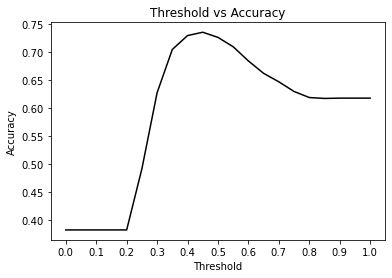

In [79]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))


plt.show()

In [80]:
converted_small = y_pred_small >= 0.5
(converted_small == y_val).mean()

0.6179653679653679

In [81]:
accuracy_score(y_val, converted_small)

0.6179653679653679

In [82]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
baseline

array([False, False, False, ..., False, False, False])

In [83]:
accuracy_score(baseline, y_val)

0.6179653679653679

## Confusion table

In [84]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [85]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[999, 143],
       [362, 344]])

In [86]:
confusion_table / confusion_table.sum()

array([[0.54058442, 0.07738095],
       [0.19588745, 0.18614719]])

## Precision and recall

In [87]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.7063655030800822, 0.48725212464589235)

In [88]:
confusion_table / confusion_table.sum()

array([[0.54058442, 0.07738095],
       [0.19588745, 0.18614719]])

In [89]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.7063655030800822, 0.48725212464589235)

## ROC and AUC

TPR and FPR

In [90]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [91]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,706,1142,0,0
10,0.1,706,1142,0,0
20,0.2,706,1142,0,0
30,0.3,469,451,237,691
40,0.4,409,202,297,940
50,0.5,344,143,362,999
60,0.6,220,97,486,1045
70,0.7,90,36,616,1106
80,0.8,9,7,697,1135
90,0.9,0,0,706,1142


In [92]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [93]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,706,1142,0,0,1.000000,1.000000
10,0.1,706,1142,0,0,1.000000,1.000000
20,0.2,706,1142,0,0,1.000000,1.000000
30,0.3,469,451,237,691,0.664306,0.394921
40,0.4,409,202,297,940,0.579320,0.176883
50,0.5,344,143,362,999,0.487252,0.125219
60,0.6,220,97,486,1045,0.311615,0.084939
70,0.7,90,36,616,1106,0.127479,0.031524
80,0.8,9,7,697,1135,0.012748,0.006130
90,0.9,0,0,706,1142,0.000000,0.000000


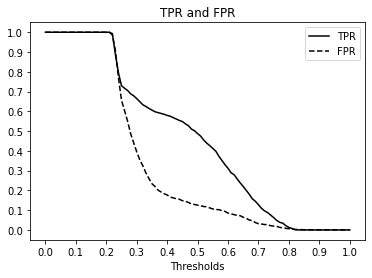

In [94]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')



plt.show()

Random baseline

In [95]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [96]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,706,1142,0,0,1.000000,1.000000
10,0.1,636,1030,70,112,0.900850,0.901926
20,0.2,568,918,138,224,0.804533,0.803853
30,0.3,506,798,200,344,0.716714,0.698774
40,0.4,437,693,269,449,0.618980,0.606830
50,0.5,382,574,324,568,0.541076,0.502627
60,0.6,312,455,394,687,0.441926,0.398424
70,0.7,231,338,475,804,0.327195,0.295972
80,0.8,155,241,551,901,0.219547,0.211033
90,0.9,83,119,623,1023,0.117564,0.104203


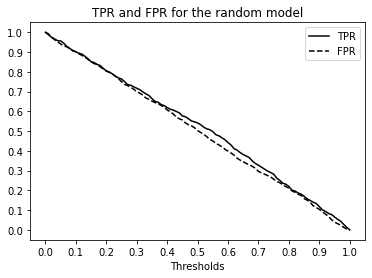

In [97]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')



plt.show()

Ideal baseline:

In [98]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,706,1142,0,0,1.000000,1.000000
10,0.1,706,957,0,185,1.000000,0.838004
20,0.2,706,772,0,370,1.000000,0.676007
30,0.3,706,587,0,555,1.000000,0.514011
40,0.4,706,403,0,739,1.000000,0.352890
50,0.5,706,218,0,924,1.000000,0.190893
60,0.6,706,33,0,1109,1.000000,0.028897
70,0.7,555,0,151,1142,0.786119,0.000000
80,0.8,370,0,336,1142,0.524079,0.000000
90,0.9,185,0,521,1142,0.262040,0.000000


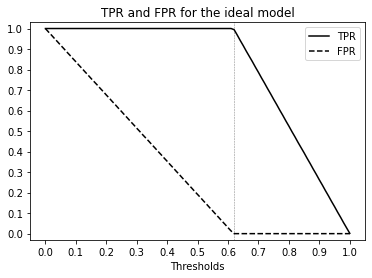

In [99]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')



plt.show()

ROC curve

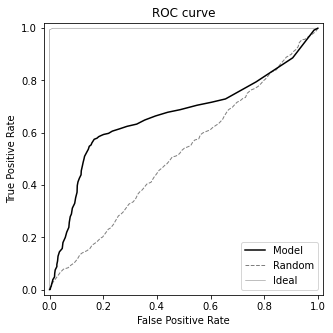

In [100]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')



plt.show()

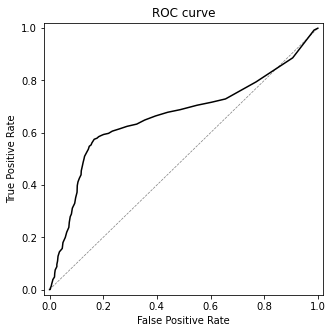

In [101]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')



plt.show()

Using Scikit-Learn for plotting the ROC curve

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [103]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

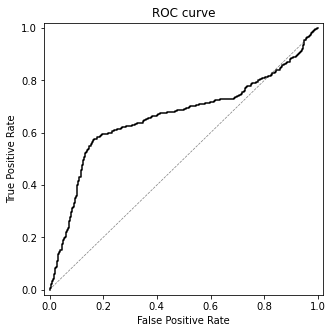

In [104]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

AUC: Area under the ROC curve

In [105]:
df_scores_small = tpr_fpr_dataframe(y_val, y_pred_small)

In [106]:
auc(df_scores.fpr, df_scores.tpr)

0.665108427638009

In [107]:
auc(df_scores_small.fpr, df_scores_small.tpr)

0.47769928012581675

Comparing multiple models with ROC curves

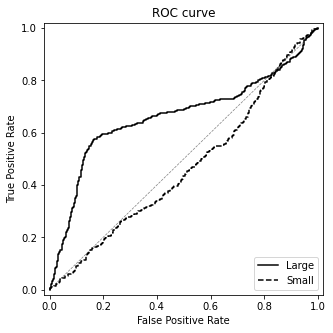

In [108]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='black', linestyle='solid', label='Large')
plt.plot(fpr_small, tpr_small, color='black', linestyle='dashed', label='Small')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(loc='lower right')

plt.show()

In [109]:
from sklearn.metrics import roc_auc_score

In [110]:
roc_auc_score(y_val, y_pred)

0.6633335483198801

In [111]:
roc_auc_score(y_val, y_pred_small)

0.46511760590981477

Interpretation of AUC: the probability that a randomly chosen positive example
ranks higher than a randomly chosen negative example

In [112]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.6691

## K-fold cross-validation

In [113]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [114]:
from sklearn.model_selection import KFold

In [115]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [116]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.converted.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [117]:
np.array(aucs).round(3)

array([0.677, 0.684, 0.655, 0.648, 0.627, 0.622, 0.662, 0.647, 0.673,
       0.668])

In [118]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.656 ± 0.020


Tuning the parameter `C`

In [119]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

In [120]:
nfolds = 10
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.656 ± 0.020
C=0.01, auc = 0.656 ± 0.020
C=0.1, auc = 0.656 ± 0.020
C=0.5, auc = 0.656 ± 0.020
C=1, auc = 0.656 ± 0.020
C=10, auc = 0.656 ± 0.020
